# Fourier tranform time series

Fourier analysis is the study of the way general functions may be represented or approximated by sums of simpler trigonometric functions. By decomposing a function in this sum we can get informations about the dominant frequencies ( or the periods ) of these functions.
When we do a Fourier transform of a function of time, we decompose it into the frequencies that make it up.

$$ \hat{f}(\omega) = \int_{-\infty}^{\infty} f(t)\ e^{- 2\pi \omega i x}\,dt $$

### 1) Discrete Fourier Transform (DFT)
Discrete-time Fourier transform (DTFT) is a form of Fourier analysis that is applicable to uniformly-spaced samples of a continuous function. The term discrete-time refers to the fact that the transform operates on discrete data (samples) whose interval often has units of time.

$$ F(\omega) = \sum_{n=0}^{N-1} x[n] \,e^{-i \omega n} $$

### 1) Example:

In [76]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

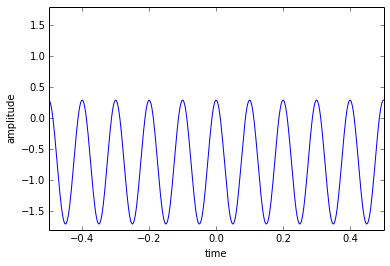

In [35]:
# We create and plot some time-series
N = 400
fs = 400
t = np.linspace(-.5, .5, N)
f0 = 10
phi = np.pi/2
A =  1

def x(A,f0,t,phi):
    return A * np.sin(2 * np.pi * f0 * t + phi)+np.cos((np.pi*f0+phi)/2)

x = x(A,f0,t,phi)

plt.plot(t, x)
plt.axis([-.5, .5, -1.8, 1.8])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

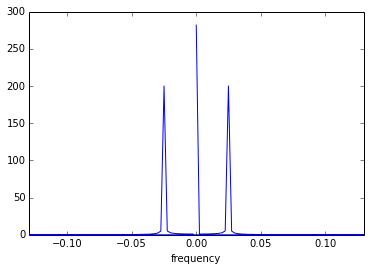

In [36]:
# We yse fft DFT function in numpy to decompose FT
DFT = np.fft.fft(x)
freq = np.fft.fftfreq(x.size)

plt.plot(freq, np.abs(DFT))
plt.xlabel('frequency')
plt.xlim(-0.13,0.13)
plt.show()

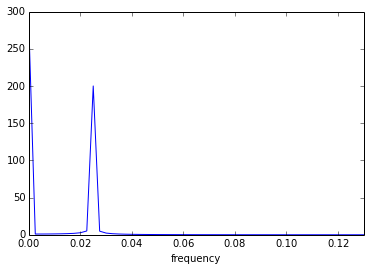

In [37]:
# Display only positive part
half = len(x) // 2
plt.plot(freq[:half], np.abs(DFT[:half]))
plt.xlabel('frequency')
plt.xlim(0,0.13)
plt.show()

### 2) Example
We are going to create some random distribution and estimate the frequencies

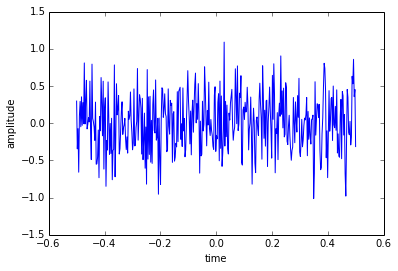

In [46]:
# 0 is the mean of the normal distribution you are choosing from
# .4 is the standard deviation of the normal distribution
# N is the number of elements you get in array noise
noise = np.random.normal(0,0.4,N)

plt.plot(t, noise)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

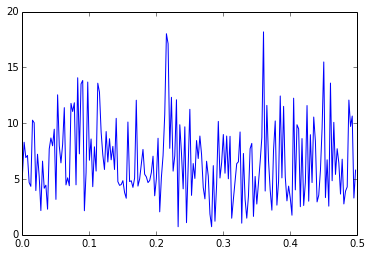

In [47]:
# Analyze the DFT (only positive half)
DFT = np.fft.fft(noise)
freq = np.fft.fftfreq(noise.size)
plt.plot(freq[:half], np.abs(DFT[:half]))
plt.show()

### 3) Example

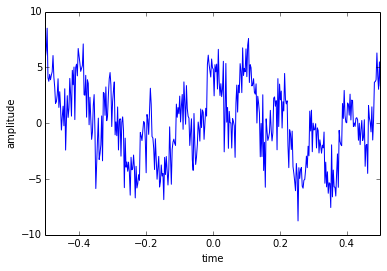

In [48]:
f1 = 10
f2 = 2

phi_1 = np.pi/3
phi_2 = np.pi/4

B = 2
C = 3
D = 4
noise = D*np.random.normal(0,.4,N)

S = A*np.sin(2*np.pi*f0*t + phi) + B*np.sin(2*np.pi*f1*t + phi_1) + C*np.sin(2*np.pi*f2*t + phi_2) + noise

plt.plot(t, S)
plt.axis([-.5, .5, -10, 10])
plt.xlabel('time')
plt.ylabel('amplitude')
plt.show()

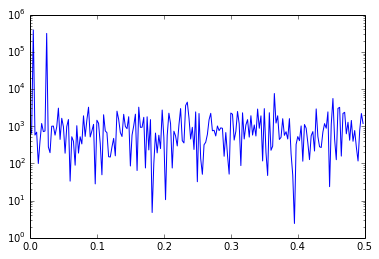

In [49]:
DFT = np.fft.fft(S)
freq = np.fft.fftfreq(S.size)
plt.plot(freq[:half], np.abs(DFT[:half]) ** 2)
plt.yscale("log")
plt.show()

### 4) Example: Sunspots
We are going to use the data of sunspots/year (after 1700AD) to estimate the frequency they occur.

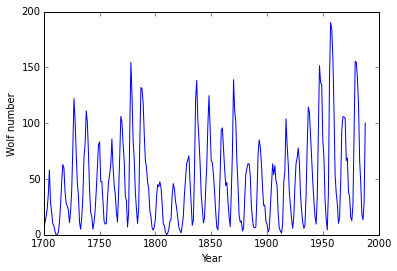

In [51]:
# Load data
wolf = np.loadtxt("data/sunspots.txt")
year = 1700 + np.arange(len(wolf)) # years starting from 1700

plt.plot(year, wolf)
plt.xlabel("Year")
plt.ylabel("Wolf number")
plt.show()

In [67]:
# Function gets signal and gives freqs, power-spectrum and phase
def get_spectra(signal):
    transform = np.fft.rfft(signal)
    frequencies = np.fft.rfftfreq(signal.size)
    power_spectrum = np.abs(transform) ** 2
    phase_spectrum = np.angle(transform)
    return frequencies, power_spectrum, phase_spectrum

freqs, power, phase = get_spectra(wolf)

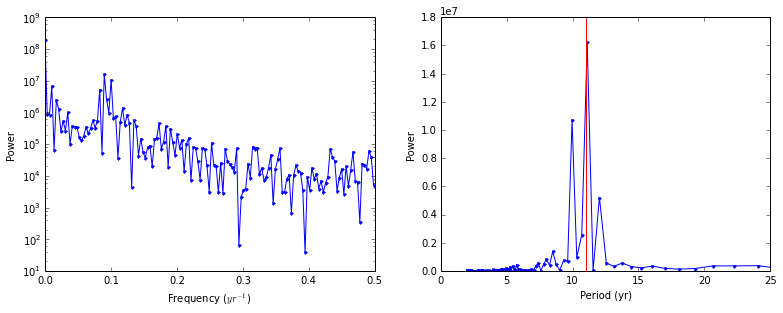

In [68]:
# Make multiple plot
plt.figure(1,figsize=(13,10))

plt.subplot(221)
plt.plot(freqs, power, ".-")
plt.xlabel("Frequency ($yr^{-1}$)"); plt.ylabel("Power")
plt.yscale("log")

# plot power vs period for period < 25yr - ignore the constant term to avoid infinity
plt.subplot(222)
plt.plot(1.0 / freqs[1:], power[1:], ".-")
plt.axvline(11, color="r")
plt.xlim([0.0, 25.0])
plt.xlabel("Period (yr)"); plt.ylabel("Power")

plt.show()